In [2]:
import os
import rasterio as rio
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
homedir = '/users/marianne/documents/pyrodiversity'
os.chdir(homedir)

In [5]:
yose = gpd.read_file("data/spatial/yosemite.shp")
hucs = gpd.read_file("data/spatial/yose_sheds.shp")
yose_fires = gpd.read_file("data/spatial/yose_mtbs.shp") 

<AxesSubplot:>

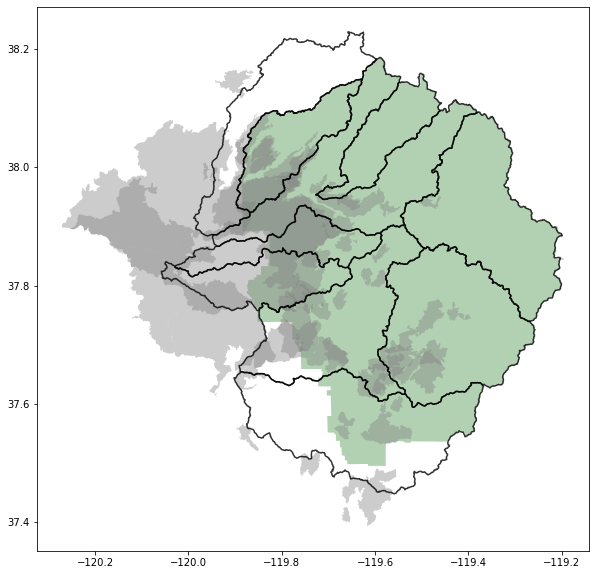

In [6]:
fig,ax = plt.subplots(figsize=(10,10))
yose.plot(ax=ax,color='darkgreen',alpha=0.3)
hucs.boundary.plot(ax=ax,color='black',alpha=0.8)
yose_fires.plot(ax=ax,color='grey',alpha=0.4)

,Fire_ID,Fire_Name,Year,StartMonth,StartDay,Fire_Type,Acres,jday,geometry
38,CA3785712008620130817,RIM,2013.0,8.0,17.0,Wildfire,257084.0,229.0,"POLYGON ((-120.11462 38.03607, -120.11455 38.0..."


In [7]:
pydi = gpd.read_file("data/yose_pyrodiv.csv")
pydi3=hucs
pydi3['FDis'] = pydi['FDis']

/var/folders/pj/dwdbrbvs73j111lmlw52vz8m0000gn/T/ipykernel_39216/2004498151.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  x = hucs[hucs.index==i].centroid.x[i]
/var/folders/pj/dwdbrbvs73j111lmlw52vz8m0000gn/T/ipykernel_39216/2004498151.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  y = hucs[hucs.index==i].centroid.y[i]


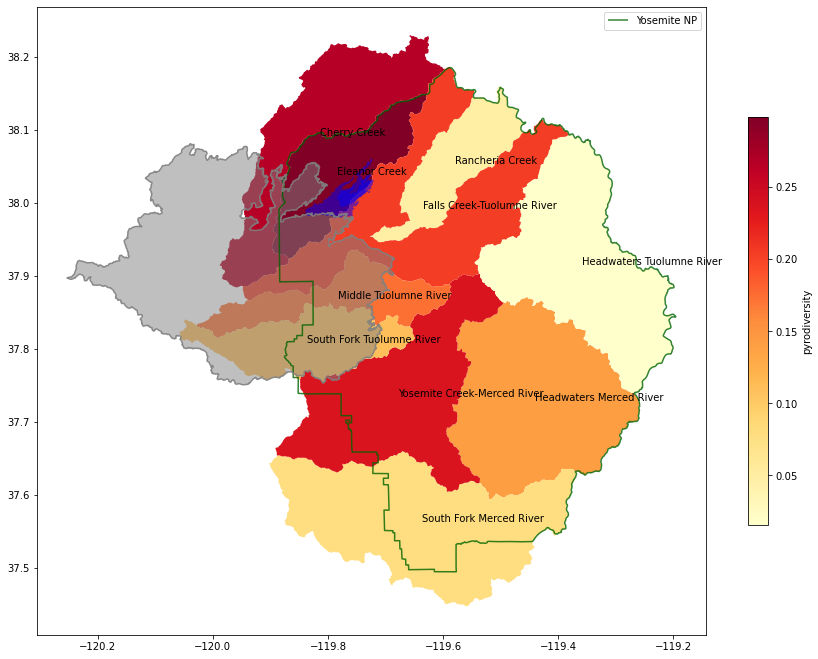

In [17]:
from matplotlib import cm
import matplotlib as mpl
import numpy as np
fig,ax=plt.subplots(figsize=(15,15))
cmap='YlOrRd'
norm  = mpl.colors.Normalize(vmin=np.nanmin(pydi3.FDis), vmax=np.nanmax(pydi3.FDis))
yose.boundary.plot(ax=ax,color='darkgreen',alpha=0.8,label = 'Yosemite NP')
pydi3.plot(column='FDis',cmap=cmap,ax=ax,alpha=1,label = 'pyrodiversity')
c = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,shrink=0.5,label = 'pyrodiversity')
#cbar.set_label('pyrodiversity')
for i in range(len(hucs.index)):
    x = hucs[hucs.index==i].centroid.x[i]
    y = hucs[hucs.index==i].centroid.y[i]
    name = hucs[hucs.index==i].Name[i]
    ax.text(x,y,name)
yose_fires[yose_fires.Fire_Name=='RIM'].plot(ax=ax,color='gray',alpha=0.5,label = 'Rim Fire')
yose_fires[yose_fires.Fire_Name=='RIM'].boundary.plot(ax=ax,color='gray',alpha=0.9)
yose_fires[yose_fires.Fire_Name=='FROG'].plot(ax=ax,color='blue',alpha=0.5,label = 'Frog Fire')
ax.legend()
plt.show()

<AxesSubplot:>

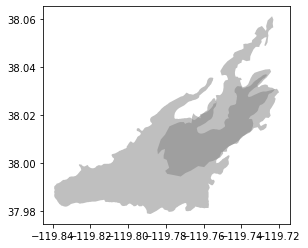

In [157]:
yose_fires[yose_fires.Fire_Name=='FROG'].plot(color='gray',alpha=0.5)


,OBJECTID,TNMID,MetaSource,SourceData,SourceOrig,SourceFeat,LoadDate,AreaSqKm,AreaAcres,GNIS_ID,...,HUMod,Shape_Leng,Shape_Area,geometry,nbsp,sing.sp,FEve,FDis,RaoQ,simpson
0,205.0,{58201B93-150A-4302-B679-DB16939E60A7},None,None,None,None,2012-10-24,593.16,146572.80,0.0,...,None,1.233793,0.060624,None,817.0,817.0,0.357435,0.189101489007725,0.054624,0.412190
1,206.0,{9B56CE3B-6B33-4CD1-9B03-EAADDF7E2108},None,None,None,None,2012-10-24,623.38,154040.12,0.0,...,None,1.598939,0.063572,None,528.0,528.0,0.372908,0.131011641344333,0.039977,0.244899
2,207.0,{1AA816C6-23B0-42DF-A6B4-89576562469F},None,None,None,None,2012-10-24,492.98,121816.99,0.0,...,None,1.541799,0.050388,None,1992.0,1992.0,0.419664,0.261555442479868,0.076412,0.667649
3,213.0,{A5662066-ACCE-4142-8935-EA2D0A5BEC5F},{6756171B-1D10-46DF-A7A0-A0FF1DF56AFD},None,None,None,2018-05-07,553.63,136803.83,0.0,...,None,1.446470,0.056723,None,74.0,74.0,0.371426,0.0158140531659895,0.005570,0.023665
4,214.0,{FF05F826-EFE6-466D-B2F1-E9AC7A80E33B},None,None,None,None,2012-10-24,193.03,47699.15,0.0,...,None,0.913068,0.019814,None,141.0,141.0,0.409355,0.0510234846053534,0.015095,0.095267
5,215.0,{99837C0A-9A57-4015-828A-E0644F8AC901},None,None,None,None,2012-10-24,242.15,59836.66,0.0,...,None,0.961090,0.024851,None,896.0,896.0,0.395835,0.298551515595896,0.092793,0.816413
6,216.0,{19867C72-3D20-4B48-BADD-8B2EC5D87E4B},{583A121C-02B0-45E9-BB74-9E39803FB47F},None,None,None,2017-02-01,367.41,90790.07,0.0,...,None,1.524079,0.037734,None,625.0,625.0,0.389465,0.289228912435528,0.091339,0.628707
7,217.0,{F470A198-5CF4-4F9A-812D-48420DE0AAA7},None,None,None,None,2012-10-24,502.12,124075.76,0.0,...,None,2.436314,0.051498,None,1242.0,1242.0,0.424473,0.259873063052385,0.074724,0.630644
8,218.0,{18A91BF2-F0D8-4C53-90F0-D9A869652C1D},None,None,None,None,2012-10-24,188.50,46580.46,0.0,...,None,1.163490,0.019302,None,708.0,708.0,0.414137,0.215374784368161,0.059865,0.948945
9,219.0,{36460FD2-1E6E-4A2E-949E-E2CE8133CB9E},None,None,None,None,2012-10-24,233.87,57790.44,0.0,...,None,1.096302,0.023928,None,1028.0,1028.0,0.427659,0.169355102217019,0.044001,0.981255


In [ ]:
pydi2.FDis.astype('float')

0    0.189101
1    0.131012
2    0.261555
3    0.015814
4    0.051023
5    0.298552
6    0.289229
7    0.259873
8    0.215375
9    0.169355
Name: FDis, dtype: float64

/Users/marianne/opt/anaconda3/envs/earthenv/lib/python3.9/site-packages/geopandas/array.py:917: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 0]),  # minx
/Users/marianne/opt/anaconda3/envs/earthenv/lib/python3.9/site-packages/geopandas/array.py:918: RuntimeWarning: All-NaN slice encountered
  np.nanmin(b[:, 1]),  # miny
/Users/marianne/opt/anaconda3/envs/earthenv/lib/python3.9/site-packages/geopandas/array.py:919: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 2]),  # maxx
/Users/marianne/opt/anaconda3/envs/earthenv/lib/python3.9/site-packages/geopandas/array.py:920: RuntimeWarning: All-NaN slice encountered
  np.nanmax(b[:, 3]),  # maxy


ValueError: cannot convert float NaN to integer

ValueError: cannot convert float NaN to integer